In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy
import matplotlib.pylab as plt

from pyinverse.grid import RegularGrid
from pyinverse.axes import RegularAxes3
from pyinverse.ellipsoid import Ellipsoid

In [3]:
# e = Ellipsoid(0.6900, 0.9200, 0.810, 0, 0, 0, 0, 0, 0, 1.0)
# e = Ellipsoid(0.6900, 0.9200, 0.810, -0.25, -0.25, 0, 0, 0, 0, 1.0)
# e = Ellipsoid(0.6900, 0.9200, 0.810, 0, 0, -0.25, 0, 0, 0, 1.0)
# e = Ellipsoid(10*0.046, 10*0.023, 10*0.02, 5*-0.08, -0.65, -0.25, 0, 0, 0, 0.1)
# e = Ellipsoid(0.31, 0.11, 0.22, -0.5, 0, 0, 0, 0, 0, -0.2)
# e = Ellipsoid(0.31, 0.11, 0.22, 0, 0, 0, 45, 0, 0, -0.2)
# e = Ellipsoid(0.31, 0.11, 0.22, -0.5, 0, 0, 45, 0, 0, -0.2)
# e = Ellipsoid(0.31, 0.11, 0.22, -0.25, -0.35, 0, 45, 0, 0, -0.2)
e = Ellipsoid(0.31, 0.11, 0.22, 0.22, 0, -0.25, 72, 0, 0, -0.2)

In [4]:
# N = 257
# N1 = N2 = N
N1 = 127
N2 = 254

# N3 = N
N3 = 257

B = 1

axes3 = RegularAxes3.linspace((-B, B, N1), (-B, B, N2), (-B, B, N3))

grid_xz = RegularGrid.linspace((-B, B, N1), (-B, B, N3))
grid_yz = RegularGrid.linspace((-B, B, N2), (-B, B, N3))
grid_xy = RegularGrid.linspace((-B, B, N1), (-B, B, N2))

In [5]:
Y_xz = e.proj(0, 0, grid_xz)
Y_yz = e.proj(0, np.pi/2, grid_yz)
Y_xy = e.proj(-np.pi/2, 0, grid_xy)

In [6]:
X, Y, Z = axes3.centers

In [7]:
E = e(X.flatten(), Y.flatten(), Z.flatten())

In [8]:
E.shape = N2, N1, N3

In [9]:
# axis = 0: z-x plane
# axis = 1: z-y plane
# axis = 2: x-y plane

Y_sum_zx = np.sum(E, axis=0)
Y_sum_xz = Y_sum_zx.T
y_dl = axes3.axis_y.T
                  
Y_sum_zy = np.sum(E, axis=1)
Y_sum_yz = Y_sum_zy.T
x_dl = axes3.axis_x.T

Y_sum_xy = np.sum(E, axis=2)
z_dl = axes3.axis_z.T

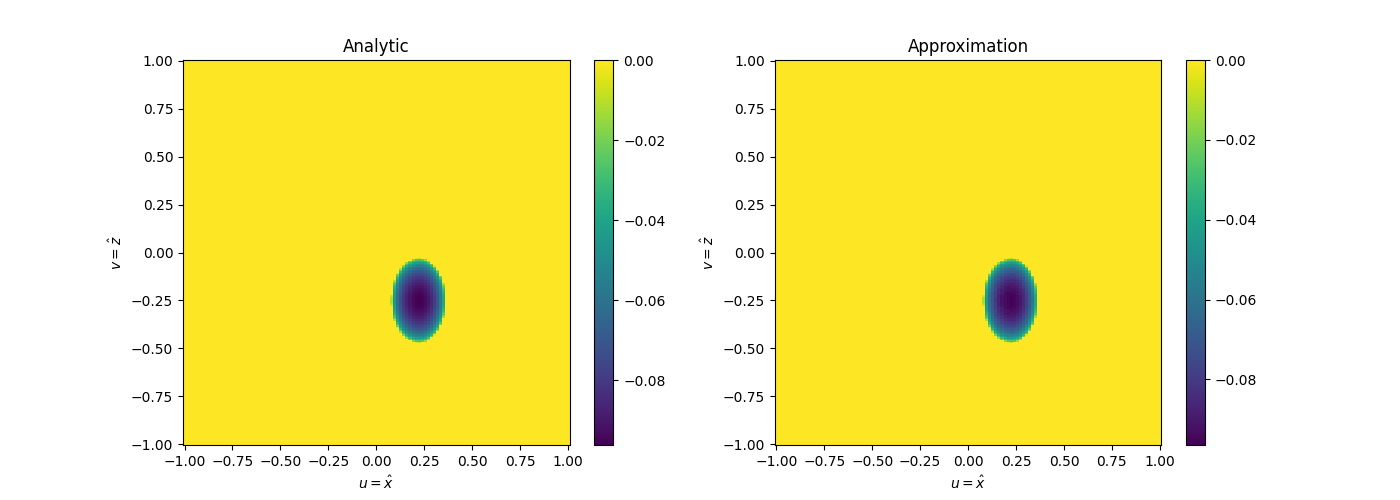

In [10]:
fig, ax = plt.subplots(figsize=(14, 5), ncols=2)
im0 = grid_xz.plot(ax[0], Y_xz)
plt.colorbar(im0)
ax[0].set_xlabel('$u = \hat{x}$')
ax[0].set_ylabel('$v = \hat{z}$')
ax[0].set_title('Analytic')
im1 = grid_xz.plot(ax[1], Y_sum_xz * y_dl)
plt.colorbar(im1)
ax[1].set_xlabel('$u = \hat{x}$')
ax[1].set_ylabel('$v = \hat{z}$')
ax[1].set_title('Approximation');

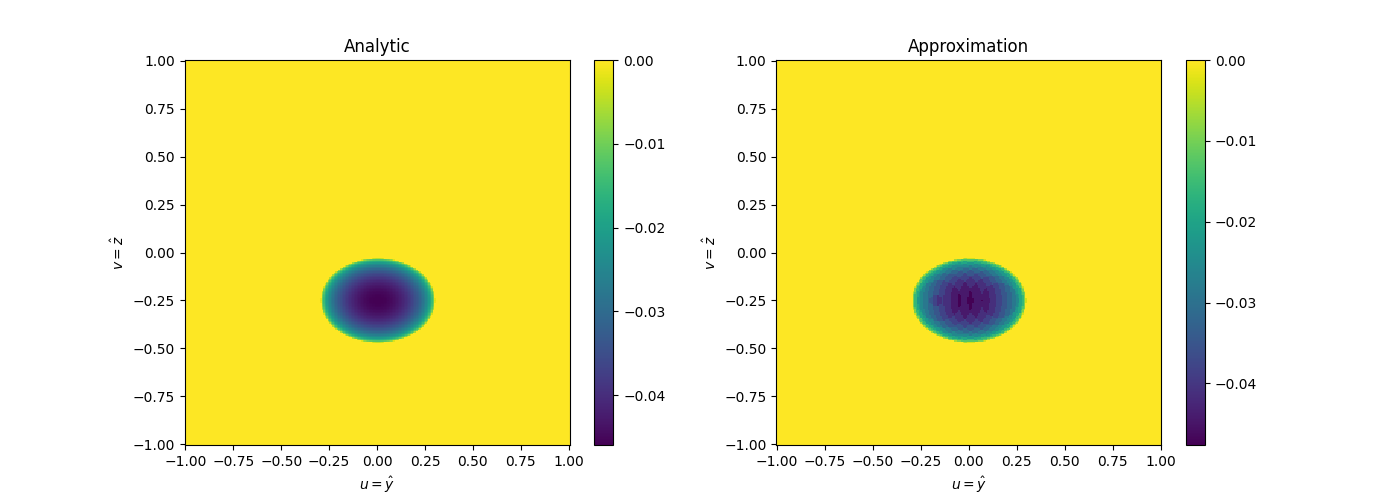

In [11]:
fig, ax = plt.subplots(figsize=(14, 5), ncols=2)
im0 = grid_yz.plot(ax[0], Y_yz)
plt.colorbar(im0)
ax[0].set_xlabel('$u = \hat{y}$')
ax[0].set_ylabel('$v = \hat{z}$')
ax[0].set_title('Analytic')
im1 = grid_yz.plot(ax[1], Y_sum_yz * x_dl)
plt.colorbar(im1)
ax[1].set_xlabel('$u = \hat{y}$')
ax[1].set_ylabel('$v = \hat{z}$')
ax[1].set_title('Approximation');

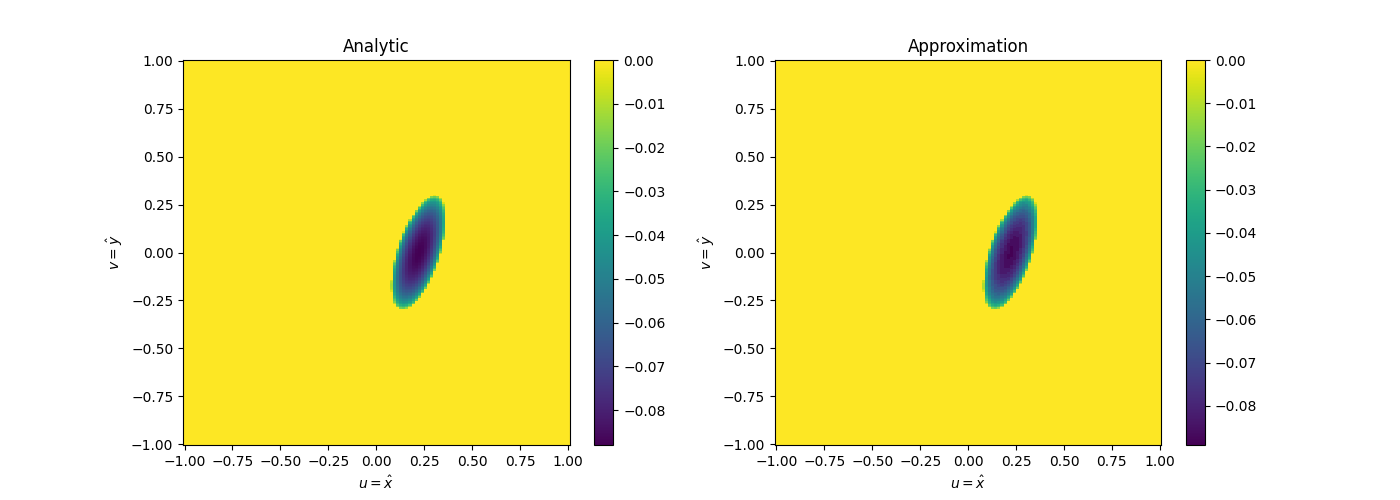

In [12]:
fig, ax = plt.subplots(figsize=(14, 5), ncols=2)
im0 = grid_xy.plot(ax[0], Y_xy)
plt.colorbar(im0)
ax[0].set_xlabel('$u = \hat{x}$')
ax[0].set_ylabel('$v = \hat{y}$')
ax[0].set_title('Analytic')
im1 = grid_xy.plot(ax[1], Y_sum_xy * z_dl)
plt.colorbar(im1)
ax[1].set_xlabel('$u = \hat{x}$')
ax[1].set_ylabel('$v = \hat{y}$')
ax[1].set_title('Approximation');

In [13]:
axes3_fftn_omega, E_fftn_omega = axes3.spectrum(E)

In [14]:
axes3_fftn_omega2, E_fftn_omega2 = axes3_fftn_omega.increasing(E_fftn_omega)

In [15]:
axes3_fftn_Hz = axes3_fftn_omega2.Hz()

In [16]:
kx, ky, kz = axes3_fftn_Hz.centers

In [17]:
E_ft = e.fourier_transform(kx, ky, kz)

In [18]:
grid_xy_fftn_Hz = RegularGrid(axes3_fftn_Hz.axis_x, axes3_fftn_Hz.axis_y)

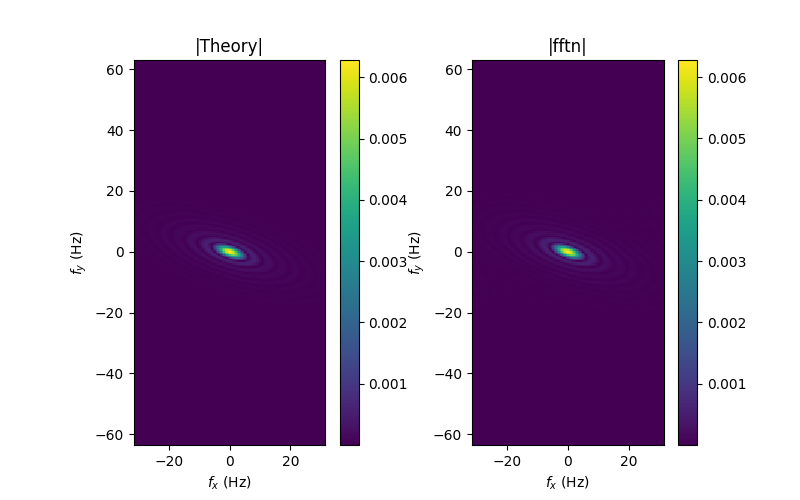

In [19]:
fig, ax = plt.subplots(figsize=(8, 5), ncols=2)
im0 = grid_xy_fftn_Hz.plot(ax[0], np.abs(E_ft[:, :, N3//2]))
ax[0].set_xlabel('$f_x$ (Hz)')
ax[0].set_ylabel('$f_y$ (Hz)')
ax[0].set_title('|Theory|')
plt.colorbar(im0, ax=ax[0])
im1 = grid_xy_fftn_Hz.plot(ax[1], np.abs(E_fftn_omega2[:, :, N3//2]))
plt.colorbar(im1, ax=ax[1])
ax[1].set_xlabel('$f_x$ (Hz)')
ax[1].set_ylabel('$f_y$ (Hz)')
ax[1].set_title('|fftn|');

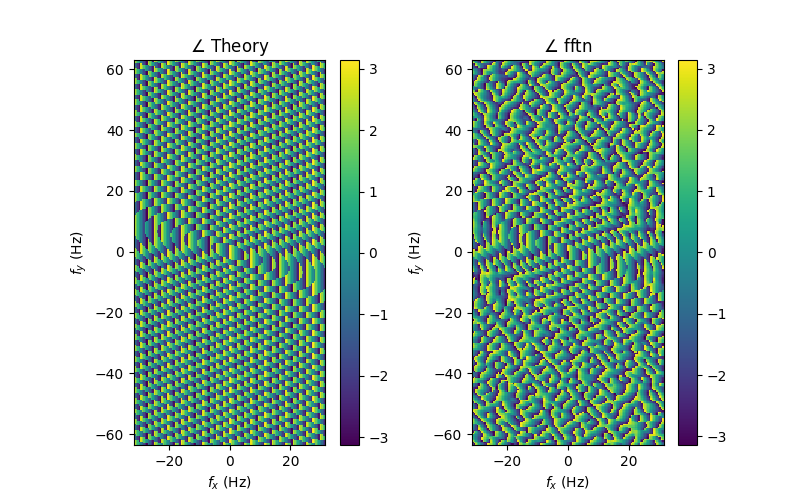

In [20]:
fig, ax = plt.subplots(figsize=(8, 5), ncols=2)
im0 = grid_xy_fftn_Hz.plot(ax[0], np.angle(E_ft[:, :, N3//2]))
ax[0].set_xlabel('$f_x$ (Hz)')
ax[0].set_ylabel('$f_y$ (Hz)')
ax[0].set_title(r'$\angle$ Theory')
plt.colorbar(im0, ax=ax[0])
im1 = grid_xy_fftn_Hz.plot(ax[1], np.angle(E_fftn_omega2[:, :, N3//2]))
plt.colorbar(im1, ax=ax[1])
ax[1].set_xlabel('$f_x$ (Hz)')
ax[1].set_ylabel('$f_y$ (Hz)')
ax[1].set_title(r'$\angle$ fftn');